In [11]:
import pandas as pd

### Define functions

In [12]:
def drop_anomolous_rows(df, colname, val):
    return df[df[colname] != val]

In [13]:
from sklearn.preprocessing import LabelEncoder

def bin_by_decade(df, colname):
    bins = pd.IntervalIndex.from_tuples([(1900, 1909), (1910, 1919), (1920, 1929), (1930, 1939), (1940, 1949), (1950, 1959), (1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2010), (2010, 2020)])
    series = pd.cut(df[colname], bins)
#     cats = series.astype('category')
#     clean_df[colname] = 'cats
    df[colname] = series
    return df

In [29]:
house = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')
testing = drop_anomolous_rows(house, 'sqft_basement', "?")
testing[testing.sqft_basement == "?"] 
# house[house.sqft_basement == "?"] 

testing['sqft_basement'].astype(float, inplace=True)
testing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null object
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [55]:
def clean():
    
    house = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')
    
# Get rid of rows

    clean_house = drop_anomolous_rows(house, 'bedrooms', 33)
    clean_house = drop_anomolous_rows(house, 'sqft_basement', "?")
    
# Bin decades

    clean_house = bin_by_decade(clean_house, 'yr_built')
    clean_house = bin_by_decade(clean_house, 'yr_renovated')
    
# Get dummies

    clean_house = pd.get_dummies(clean_house, columns=(['view', 'floors', 'bedrooms', 'condition', 'zipcode', 'yr_built', 'yr_renovated']))
#     clean_house_dummies = dummies_df(house, ['view', 'floors', 'bedrooms', 'condition', 'zipcode'])

# Append dummies to clean_house

#     clean_house = pd.concat([clean_house, yr_built_df, yr_renovated_df, clean_house_dummies], axis=1)
    
# Drop columns that we created dummies for

#     clean_house = clean_house.drop(['yr_built', 'yr_renovated', 'view', 'floors', 'bedrooms', 'condition', 'zipcode'], axis=1)

# Drop highly correlated features
    
    clean_house = clean_house.drop(['sqft_above', 'bathrooms', 'grade'], axis=1)
    
# Drop id, date, waterfront

    clean_house = clean_house.drop(['id', 'date', 'waterfront'], axis=1)
    
# Convert sqft_basement from object to int

#   clean_house = clean_house.drop(['sqft_basement'], axis=1)
    clean_house['sqft_basement'] = clean_house['sqft_basement'].astype(float, inplace=True)

# Return clean_house
    
    return clean_house

### Get clean dataframe

In [56]:
clean_house = clean()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
clean_house.head()

,price,sqft_living,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,view_0.0,view_1.0,...,"yr_renovated_(1920, 1929]","yr_renovated_(1930, 1939]","yr_renovated_(1940, 1949]","yr_renovated_(1950, 1959]","yr_renovated_(1960, 1969]","yr_renovated_(1970, 1979]","yr_renovated_(1980, 1989]","yr_renovated_(1990, 1999]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
0,221900.0,1180,5650,0.0,47.5112,-122.257,1340,5650,1,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,400.0,47.7210,-122.319,1690,7639,1,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,770,10000,0.0,47.7379,-122.233,2720,8062,1,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,910.0,47.5208,-122.393,1360,5000,1,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1680,8080,0.0,47.6168,-122.045,1800,7503,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
 clean_house.isnull().sum()
# clean_house2 =  clean_house.dropna()

price                        0
sqft_living                  0
sqft_lot                     0
sqft_basement                0
lat                          0
long                         0
sqft_living15                0
sqft_lot15                   0
view_0.0                     0
view_1.0                     0
view_2.0                     0
view_3.0                     0
view_4.0                     0
floors_1.0                   0
floors_1.5                   0
floors_2.0                   0
floors_2.5                   0
floors_3.0                   0
floors_3.5                   0
bedrooms_1                   0
bedrooms_2                   0
bedrooms_3                   0
bedrooms_4                   0
bedrooms_5                   0
bedrooms_6                   0
bedrooms_7                   0
bedrooms_8                   0
bedrooms_9                   0
bedrooms_10                  0
bedrooms_11                  0
                            ..
zipcode_98168                0
zipcode_

In [59]:
# clean_house2.isnull().sum()
# len(clean_house2) - len(house)
# len(house) - len(clean_house2)


### Checking for colinearity

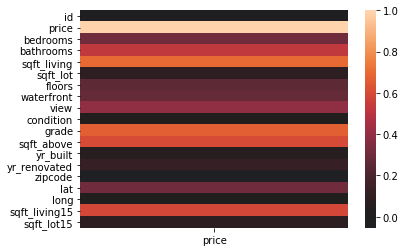

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(house.corr()[["price"]], center=0)
plt.show()


# sqft_above/sqft_living (87.7), bathrooms/sqft_living (75.5), grade/sqft_living(75.6)

### Investigating distributions

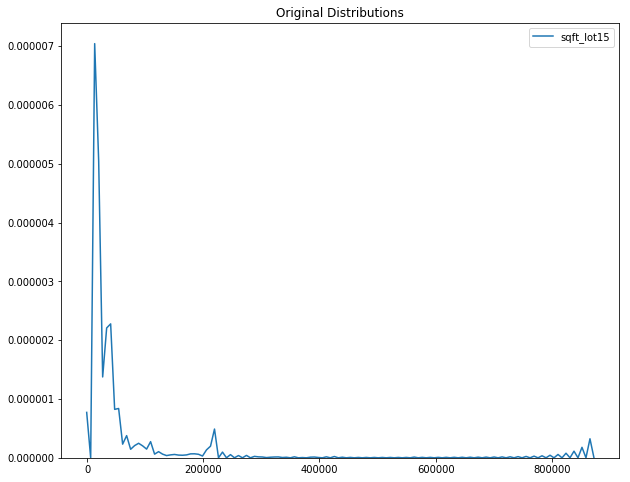

In [61]:
# plot original distribution plot
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

# sns.kdeplot(clean_house['price'], ax=ax1)
# sns.kdeplot(clean_house['lat'], ax=ax1)
sns.kdeplot(clean_house['sqft_lot15'], ax=ax1)

### First pass at a shitty regression before scaling, standardizing

In [41]:
target = clean_house["price"]
predictors = clean_house.drop(["price"], axis=1)

import numpy as np
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(target,predictors_int).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     656.8
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        08:35:55   Log-Likelihood:            -2.8436e+05
No. Observations:               21143   AIC:                         5.690e+05
Df Residuals:                   21020   BIC:                         5.699e+05
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.377e+07   4.47e+06     -5.318      0.000   -3.25e+07    -1.5e+07
sqft_living                 263.3581      2.753     95.649      0.000     257.961     268.755
sqft_lot                      0.2591      0.041      6.308      0.000       0.179       0.340
sqft_basement               -98.0046      3.855    -25.423      0.000    -105.561     -90.449
lat                        1.994e+05   6.72e+04      2.968      0.003    6.77e+04    3.31e+05
long                      -2.068e+05   4.86e+04     -4.254      0.000   -3.02e+05   -1.12e+05
sqft_living15                30.7899      2.995     10.280      0.000      24.919      36.661
sqft_lot15                   -0.1497      0.065     -2.309      0.021      -0.277      -0.023
view_0.0                  -8.478e+04   2.16e+04     -3.918      0.000   -1.27e+05   -4.24e+04
view_1.0                  -2970.5373   2.36e+04     -0.126      0.900   -4.91e+04    4.32e+04
view_2.0                   2275.7055   2.23e+04      0.102      0.919   -4.15e+04     4.6e+04
view_3.0                   1.027e+05    2.3e+04      4.474      0.000    5.77e+04    1.48e+05
view_4.0                   5.039e+05   2.38e+04     21.206      0.000    4.57e+05    5.51e+05
floors_1.0                -3.947e+06   7.45e+05     -5.298      0.000   -5.41e+06   -2.49e+06
floors_1.5                 -3.98e+06   7.45e+05     -5.343      0.000   -5.44e+06   -2.52e+06
floors_2.0                -4.001e+06   7.45e+05     -5.371      0.000   -5.46e+06   -2.54e+06
floors_2.5                -3.906e+06   7.45e+05     -5.243      0.000   -5.37e+06   -2.45e+06
floors_3.0                -4.027e+06   7.45e+05     -5.404      0.000   -5.49e+06   -2.57e+06
floors_3.5                 -3.91e+06   7.47e+05     -5.234      0.000   -5.37e+06   -2.45e+06
bedrooms_1                -1.827e+06   3.73e+05     -4.899      0.000   -2.56e+06    -1.1e+06
bedrooms_2                -1.849e+06   3.73e+05     -4.955      0.000   -2.58e+06   -1.12e+06
bedrooms_3                -1.872e+06   3.73e+05     -5.018      0.000    -2.6e+06   -1.14e+06
bedrooms_4                -1.916e+06   3.73e+05     -5.135      0.000   -2.65e+06   -1.18e+06
bedrooms_5                -1.936e+06   3.73e+05     -5.188      0.000   -2.67e+06    -1.2e+06
bedrooms_6                -1.958e+06   3.73e+05     -5.246      0.000   -2.69e+06   -1.23e+06
bedrooms_7                -2.084e+06   3.74e+05     -5.575      0.000   -2.82e+06   -1.35e+06
bedrooms_8                -1.946e+06   3.76e+05     -5.179      0.000   -2.68e+06   -1.21e+06
bedrooms_9                -2.203e+06   3.79e+05     -5.816      0.000   -2.95e+06   -1.46e+06
bedrooms_10               -2.278e+06   3.83e+05     -5.950      0.000   -3.03e+06   -1.53e+06
bedrooms_11               -2.054e+06   4.05e+05     -5.073      0.000   -2.

### log transformation (didn't improve model)

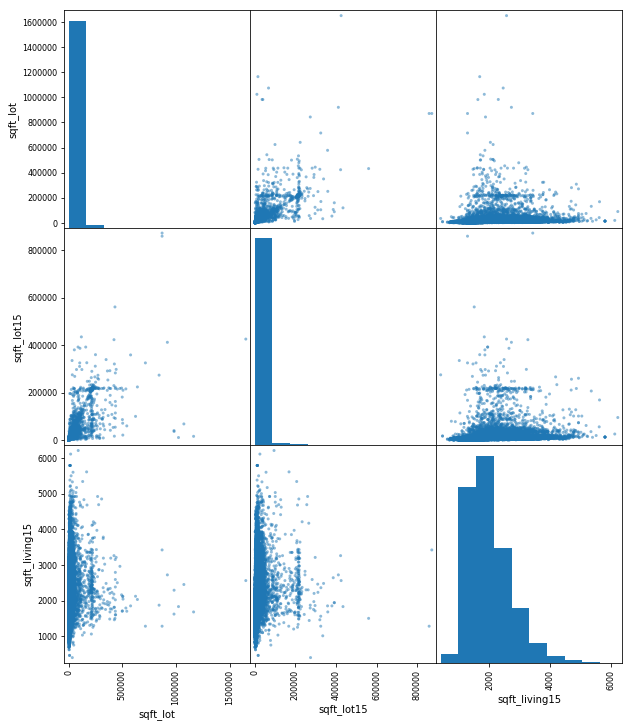

In [42]:
non_normal = ['sqft_lot', 'sqft_lot15', 'sqft_living15']

pd.plotting.scatter_matrix(clean_house[non_normal], figsize=(10,12));

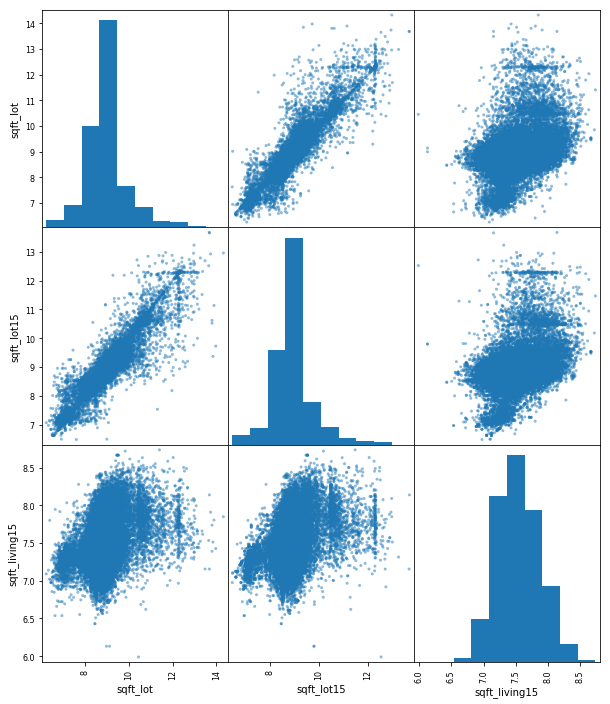

In [43]:
for feat in non_normal:
    clean_house[feat] = clean_house[feat].map(lambda x: np.log(x))

pd.plotting.scatter_matrix(clean_house[non_normal], figsize=(10,12));

In [44]:
target = clean_house["price"]
predictors = clean_house.drop(["price"], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     657.9
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        08:36:30   Log-Likelihood:            -2.8435e+05
No. Observations:               21143   AIC:                         5.689e+05
Df Residuals:                   21020   BIC:                         5.699e+05
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.065e+07    4.5e+06     -6.808      0.000   -3.95e+07   -2.18e+07
sqft_living                 265.4255      2.761     96.123      0.000     260.013     270.838
sqft_lot                   2.806e+04   3445.871      8.144      0.000    2.13e+04    3.48e+04
sqft_basement               -95.4766      3.880    -24.605      0.000    -103.082     -87.871
lat                          2.2e+05   6.72e+04      3.276      0.001    8.84e+04    3.52e+05
long                      -2.793e+05    4.9e+04     -5.705      0.000   -3.75e+05   -1.83e+05
sqft_living15              4923.6593   6083.722      0.809      0.418   -7000.903    1.68e+04
sqft_lot15                -1053.9948   3792.556     -0.278      0.781   -8487.697    6379.707
view_0.0                  -8.798e+04   2.16e+04     -4.069      0.000    -1.3e+05   -4.56e+04
view_1.0                    919.0815   2.35e+04      0.039      0.969   -4.52e+04    4.71e+04
view_2.0                   4928.6363   2.23e+04      0.221      0.825   -3.88e+04    4.86e+04
view_3.0                   1.087e+05   2.29e+04      4.739      0.000    6.37e+04    1.54e+05
view_4.0                   5.084e+05   2.37e+04     21.414      0.000    4.62e+05    5.55e+05
floors_1.0                -5.101e+06    7.5e+05     -6.797      0.000   -6.57e+06   -3.63e+06
floors_1.5                -5.133e+06    7.5e+05     -6.841      0.000    -6.6e+06   -3.66e+06
floors_2.0                -5.146e+06    7.5e+05     -6.858      0.000   -6.62e+06   -3.68e+06
floors_2.5                -5.052e+06    7.5e+05     -6.733      0.000   -6.52e+06   -3.58e+06
floors_3.0                -5.167e+06    7.5e+05     -6.885      0.000   -6.64e+06    -3.7e+06
floors_3.5                -5.049e+06   7.52e+05     -6.712      0.000   -6.52e+06   -3.57e+06
bedrooms_1                -2.394e+06   3.76e+05     -6.372      0.000   -3.13e+06   -1.66e+06
bedrooms_2                -2.416e+06   3.76e+05     -6.429      0.000   -3.15e+06   -1.68e+06
bedrooms_3                -2.441e+06   3.76e+05     -6.496      0.000   -3.18e+06    -1.7e+06
bedrooms_4                -2.483e+06   3.76e+05     -6.608      0.000   -3.22e+06   -1.75e+06
bedrooms_5                -2.504e+06   3.76e+05     -6.664      0.000   -3.24e+06   -1.77e+06
bedrooms_6                -2.531e+06   3.76e+05     -6.733      0.000   -3.27e+06   -1.79e+06
bedrooms_7                -2.661e+06   3.76e+05     -7.070      0.000    -3.4e+06   -1.92e+06
bedrooms_8                -2.519e+06   3.78e+05     -6.658      0.000   -3.26e+06   -1.78e+06
bedrooms_9                -2.782e+06   3.81e+05     -7.294      0.000   -3.53e+06   -2.03e+06
bedrooms_10               -2.863e+06   3.86e+05     -7.426      0.000   -3.62e+06   -2.11e+06
bedrooms_11               -2.629e+06   4.07e+05     -6.455      0.000   -3.

### Feature standardizing (neither min/max nor standard scalar applied to the whole df improved the model

In [45]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
clean_house_mm = mm_scaler.fit_transform(clean_house)

clean_house_mm = pd.DataFrame(clean_house_mm, columns=list(clean_house.columns))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
target = clean_house_mm["price"]
predictors = clean_house_mm.drop(["price"], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     657.9
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        08:36:49   Log-Likelihood:                 50698.
No. Observations:               21143   AIC:                        -1.011e+05
Df Residuals:                   21020   BIC:                        -1.002e+05
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0057      0.004     -1.350      0.177      -0.014       0.003
sqft_living                   0.4586      0.005     96.123      0.000       0.449       0.468
sqft_lot                      0.0297      0.004      8.144      0.000       0.023       0.037
sqft_basement                -0.0604      0.002    -24.605      0.000      -0.065      -0.056
lat                           0.0179      0.005      3.276      0.001       0.007       0.029
long                         -0.0441      0.008     -5.705      0.000      -0.059      -0.029
sqft_living15                 0.0018      0.002      0.809      0.418      -0.003       0.006
sqft_lot15                   -0.0010      0.004     -0.278      0.781      -0.008       0.006
view_0.0                     -0.0115      0.003     -4.069      0.000      -0.017      -0.006
view_1.0                      0.0001      0.003      0.039      0.969      -0.006       0.006
view_2.0                      0.0006      0.003      0.221      0.825      -0.005       0.006
view_3.0                      0.0143      0.003      4.739      0.000       0.008       0.020
view_4.0                      0.0667      0.003     21.414      0.000       0.061       0.073
floors_1.0                -2.528e-05      0.002     -0.017      0.987      -0.003       0.003
floors_1.5                   -0.0042      0.002     -2.676      0.007      -0.007      -0.001
floors_2.0                   -0.0060      0.001     -4.021      0.000      -0.009      -0.003
floors_2.5                    0.0064      0.002      3.041      0.002       0.002       0.011
floors_3.0                   -0.0087      0.002     -5.179      0.000      -0.012      -0.005
floors_3.5                    0.0068      0.007      0.944      0.345      -0.007       0.021
bedrooms_1                    0.0205      0.003      6.344      0.000       0.014       0.027
bedrooms_2                    0.0176      0.003      6.111      0.000       0.012       0.023
bedrooms_3                    0.0143      0.003      5.022      0.000       0.009       0.020
bedrooms_4                    0.0088      0.003      3.083      0.002       0.003       0.014
bedrooms_5                    0.0060      0.003      2.089      0.037       0.000       0.012
bedrooms_6                    0.0026      0.003      0.824      0.410      -0.004       0.009
bedrooms_7                   -0.0145      0.004     -3.279      0.001      -0.023      -0.006
bedrooms_8                    0.0041      0.006      0.641      0.521      -0.008       0.016
bedrooms_9                   -0.0303      0.009     -3.448      0.001      -0.048      -0.013
bedrooms_10                  -0.0410      0.012     -3.402      0.001      -0.065      -0.017
bedrooms_11                  -0.0104      0.021     -0.504      0.614      

In [47]:
from sklearn import preprocessing
mm_scaler = preprocessing.StandardScaler()
clean_house_ss = mm_scaler.fit_transform(clean_house)

clean_house_ss = pd.DataFrame(clean_house_ss, columns=list(clean_house.columns))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
target = clean_house_ss["price"]
predictors = clean_house_ss.drop(["price"], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     657.9
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        08:36:53   Log-Likelihood:                -13377.
No. Observations:               21143   AIC:                         2.700e+04
Df Residuals:                   21020   BIC:                         2.798e+04
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.094e-15      0.003    1.3e-12      1.000      -0.006       0.006
sqft_living                   0.6624      0.007     96.123      0.000       0.649       0.676
sqft_lot                      0.0687      0.008      8.144      0.000       0.052       0.085
sqft_basement                -0.1148      0.005    -24.605      0.000      -0.124      -0.106
lat                           0.0828      0.025      3.276      0.001       0.033       0.132
long                         -0.1067      0.019     -5.705      0.000      -0.143      -0.070
sqft_living15                 0.0044      0.005      0.809      0.418      -0.006       0.015
sqft_lot15                   -0.0023      0.008     -0.278      0.781      -0.019       0.014
view_0.0                     -0.0719      0.018     -4.069      0.000      -0.106      -0.037
view_1.0                      0.0003      0.008      0.039      0.969      -0.015       0.016
view_2.0                      0.0027      0.012      0.221      0.825      -0.022       0.027
view_3.0                      0.0447      0.009      4.739      0.000       0.026       0.063
view_4.0                      0.1663      0.008     21.414      0.000       0.151       0.182
floors_1.0                    0.0332      0.003     11.229      0.000       0.027       0.039
floors_1.5                   -0.0056      0.003     -1.785      0.074      -0.012       0.001
floors_2.0                   -0.0277      0.003     -9.376      0.000      -0.034      -0.022
floors_2.5                    0.0171      0.003      5.328      0.000       0.011       0.023
floors_3.0                   -0.0187      0.004     -5.324      0.000      -0.026      -0.012
floors_3.5                    0.0038      0.003      1.192      0.233      -0.002       0.010
bedrooms_1                    0.0166      0.003      5.216      0.000       0.010       0.023
bedrooms_2                    0.0389      0.003     12.446      0.000       0.033       0.045
bedrooms_3                    0.0242      0.002     11.277      0.000       0.020       0.028
bedrooms_4                   -0.0308      0.002    -12.759      0.000      -0.035      -0.026
bedrooms_5                   -0.0322      0.003    -10.403      0.000      -0.038      -0.026
bedrooms_6                   -0.0216      0.003     -6.778      0.000      -0.028      -0.015
bedrooms_7                   -0.0226      0.003     -7.127      0.000      -0.029      -0.016
bedrooms_8                   -0.0041      0.003     -1.279      0.201      -0.010       0.002
bedrooms_9                   -0.0148      0.003     -4.656      0.000      -0.021      -0.009
bedrooms_10                  -0.0131      0.003     -4.150      0.000      -0.019      -0.007
bedrooms_11                  -0.0032      0.003     -1.006      0.314      

### Feature selection

In [49]:
# copied function from Model Fit Linear Regression Lab

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [50]:
target = clean_house_ss["price"]
predictors = clean_house_ss.drop(["price"], axis=1)

result = stepwise_selection(predictors, target, verbose = True)
print('resulting features:')
print(result)

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Add  sqft_living15                  with p-value 0.0
Add  view_4.0                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  zipcode_98004                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98039                  with p-value 1.93001e-280
Add  zipcode_98112                  with p-value 5.06117e-231
Add  zipcode_98040                  with p-value 1.21214e-233
Add  view_0.0                       with p-value 1.70438e-198
Drop sqft_living15                  with p-value 0.232876


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zipcode_98105                  with p-value 1.3713e-83
Add  zipcode_98119                  with p-value 2.41175e-84
Add  zipcode_98199                  with p-value 2.88193e-67
Add  zipcode_98102                  with p-value 3.26894e-68
Add  zipcode_98109                  with p-value 4.71913e-64
Add  zipcode_98033                  with p-value 4.55673e-59
Add  zipcode_98006                  with p-value 3.39482e-60
Add  sqft_basement                  with p-value 2.90166e-62
Add  zipcode_98103                  with p-value 3.09732e-62
Add  zipcode_98122                  with p-value 2.45469e-65
Add  zipcode_98115                  with p-value 1.83362e-61
Add  zipcode_98117                  with p-value 2.18593e-58
Add  zipcode_98107                  with p-value 2.13083e-50
Add  zipcode_98116                  with p-value 3.1029e-51
Add  zipcode_98144                  with p-value 7.13792e-51
Add  zipcode_98005                  with p-value 1.41289e-46
Add  zipcode_98136        

In [51]:
# target = clean_house_ss["price"]
# predictors = clean_house_ss.drop(["price"], axis=1)

# #from sklearn.datasets import make_friedman1
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# linreg = LinearRegression()
# selector = RFE(linreg, n_features_to_select = 20)
# selector = selector.fit(predictors, target)

In [52]:
# selected_columns = clean_house_ss.columns[selector.support_]
# model = linreg.fit(clean_house_ss[selected_columns], target)

In [53]:
clean_house_selections_list = ['price', 'zipcode_98004', 'sqft_living', 'view_4.0', 'lat', 'zipcode_98039', 'zipcode_98112', 'zipcode_98040', 'view_0.0', 'zipcode_98105', 'zipcode_98119', 'zipcode_98199', 'zipcode_98102', 'zipcode_98109', 'zipcode_98033', 'zipcode_98006', 'zipcode_98103', 'zipcode_98122', 'zipcode_98115', 'zipcode_98117', 'zipcode_98107', 'zipcode_98116', 'zipcode_98144', 'zipcode_98005', 'zipcode_98136', 'view_3.0', 'zipcode_98029', 'sqft_lot', 'bedrooms_2', 'bedrooms_3', 'zipcode_98008', 'zipcode_98052', 'zipcode_98126', 'yr_renovated_(2000, 2010]', 'zipcode_98075', 'condition_5', 'zipcode_98007', 'zipcode_98027', 'zipcode_98074', 'zipcode_98118', 'yr_built_(2010, 2020]', 'zipcode_98019', 'bedrooms_1', 'bedrooms_4', 'floors_2.5', 'yr_built_(1970, 1979]', 'zipcode_98034', 'zipcode_98053', 'yr_built_(1960, 1969]', 'yr_built_(1950, 1959]', 'zipcode_98125', 'zipcode_98106', 'zipcode_98177', 'condition_4', 'bedrooms_5', 'yr_built_(1980, 1989]', 'bedrooms_6', 'zipcode_98014', 'zipcode_98059', 'zipcode_98028', 'yr_built_(1930, 1939]', 'zipcode_98178', 'condition_1', 'zipcode_98056', 'yr_renovated_(2010, 2020]', 'yr_built_(2000, 2010]', 'zipcode_98092', 'bedrooms_8', 'zipcode_98146', 'zipcode_98133', 'zipcode_98108', 'zipcode_98166', 'sqft_living15', 'yr_renovated_(1990, 1999]']
clean_house_selections = clean_house_ss[clean_house_selections_list]

In [54]:
target = clean_house_selections["price"]
predictors = clean_house_selections.drop(["price"], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1056.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        08:44:40   Log-Likelihood:                -13732.
No. Observations:               21143   AIC:                         2.761e+04
Df Residuals:                   21069   BIC:                         2.820e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.121e-15      0.003  -2.23e-12      1.000      -0.006       0.006
zipcode_98004                 0.2352      0.003     69.195      0.000       0.229       0.242
sqft_living                   0.5778      0.006     99.536      0.000       0.566       0.589
view_4.0                      0.1625      0.004     45.529      0.000       0.155       0.169
lat                           0.1312      0.005     25.536      0.000       0.121       0.141
zipcode_98039                 0.1658      0.003     51.188      0.000       0.159       0.172
zipcode_98112                 0.1699      0.003     49.462      0.000       0.163       0.177
zipcode_98040                 0.1532      0.003     45.515      0.000       0.147       0.160
view_0.0                     -0.0666      0.004    -15.914      0.000      -0.075      -0.058
zipcode_98105                 0.1096      0.003     32.046      0.000       0.103       0.116
zipcode_98119                 0.1045      0.003     31.065      0.000       0.098       0.111
zipcode_98199                 0.0998      0.003     28.689      0.000       0.093       0.107
zipcode_98102                 0.0851      0.003     25.813      0.000       0.079       0.092
zipcode_98109                 0.0830      0.003     25.199      0.000       0.077       0.089
zipcode_98033                 0.1022      0.003     29.245      0.000       0.095       0.109
zipcode_98006                 0.0902      0.003     26.369      0.000       0.084       0.097
zipcode_98103                 0.1081      0.004     28.555      0.000       0.101       0.115
zipcode_98122                 0.0876      0.003     25.579      0.000       0.081       0.094
zipcode_98115                 0.0953      0.004     25.744      0.000       0.088       0.103
zipcode_98117                 0.0890      0.004     23.879      0.000       0.082       0.096
zipcode_98107                 0.0762      0.003     21.967      0.000       0.069       0.083
zipcode_98116                 0.0676      0.003     19.930      0.000       0.061       0.074
zipcode_98144                 0.0694      0.003     20.219      0.000       0.063       0.076
zipcode_98005                 0.0605      0.003     18.368      0.000       0.054       0.067
zipcode_98136                 0.0540      0.003     16.227      0.000       0.047       0.060
view_3.0                      0.0402      0.004     10.791      0.000       0.033       0.047
zipcode_98029                 0.0542      0.003     16.287      0.000       0.048       0.061
sqft_lot                      0.0857      0.005     18.566      0.000       0.077       0.095
bedrooms_2                    0.2465      0.023     10.585      0.000       0.201       0.292
bedrooms_3                    0.3294      0.034      9.581      0.000      